The layer is the fundamental neural network building block

- layers map tensors to tensors

- parameterised by weights and biases

- weights and biases update in the SGD feedback loop  

The layer is the fundamental neural network building block. Layers map tensors to tensors and are parameterised by weights and biases. Layer parameters update in the SGD feedback loop. 

**Feedforward** networks

- the sample is fed into the network
- data is transformed by successive layers
- an output emerges

A sample, in a 'feedforward' network, is fed into the network; data is transformed by successive layers and an output emerges.

**Dense/fully connected** layer

- the layer weight matrix has size $n \times m$ 

- the incoming vector has length $m$

- the output vector has length $n$

A dense or fully connected layer has an n x m weight matrix; the incoming vector has length m and the outgoing tramsformed vector has length n. The bias tensor is an n component vector.

**Recurrent** layer

- a recurrent neural network contains internal loops
- data is processed by iterating through the sequence of elements

A 'recurrent' neural network contains internal loops: ordered data is processed by iterating through the sequence of constituent elements. We don't consider recurrent networks here - Part 2 of Deep Learning With Python explains the concept and has several example networks. Recurrent layers are particularly useful when the samples have a time ordering, for example weather measurements. 

**Convolutional** layer
- a small window moves
across a 2D image
- a convolution
- the response is mapped to layer weights

Convolutional layers are the first choice for computer vision applications of deep learning. Convnets move a small window across a 2D image and the response, or convolution, is mapped to layer weights. We don't cover convnets in this module but the idea is explained DLWP part 2. 

|Data|Network|
|:---|:---|
Vector|Dense
Sequence|Recurrent
Image|Convolutional

A summary table matching type of layer and network. A dense network processes vector data; sequence data is processed by recurrent networks and convolutional layers are recommended for computer vision tasks

A layer performs a tensor operation on the input $x$ - an affine transformation followed by element-wise function application

We return to dense layers and feedforward networks. The dense layer performs a tensor operation on an input $x$. Namely, an affine transformation followed by element-wise function application.


Affine transformation

\begin{align*}
z = \begin{pmatrix}w_{11} & w_{12} \\ w_{21} & w_{22} \end{pmatrix} \cdot \begin{pmatrix}x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix}b_1 \\ b_2 \end{pmatrix}
\end{align*}

- rotations, reflections, shears, dilations

- affine transformation preserve straight lines and parallel lines remain parallel 

An affine transformation is a 2D matrix transformation such as a rotation, a reflection or a shear, followed by a translation. w dot x plus b. Straight lines remain straight and parallel lines remain parallel - although distances and angles may change.

Affine transformations alone are insufficient for data uncrumpling 

We require a non-linear part -  the activation

$f(z) = f\begin{pmatrix} z_1 \\ z_2 \end{pmatrix}\ =\begin{pmatrix} f(z_1) \\ f(z_2) \end{pmatrix}$

**sigmoid**, **rectified linear** and **tanh** are common activation functions

Affine transformations alone are insufficient for data uncrumpling. We require a non-linear part -  the element-wise activation. 'Sigmoid', 'rectified linear' and 'tanh' are common activation functions.

\begin{align*}
\text{relu}(x) &= \max(0, x) \\
\\
\tanh(x)&= \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
\\
\text{sigmoid}(x) &= \frac{1}{1 + e^{-z}}
\end{align*}

The definitions of relu (recified linear), tanh and sigmoid.

In [1]:
import numpy as np
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def plot_sigmoid():
  import matplotlib.pyplot as plt
  x = np.arange(-5, 5, 0.1)
  plt.plot(x, sigmoid(x), 'b')
  plt.show()

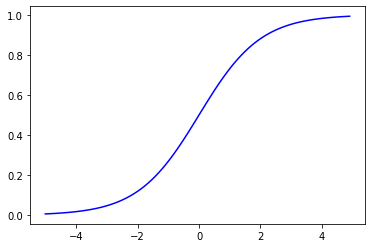

In [2]:
plot_sigmoid()

Here is the shape of the sigmoid function... It is like a a smoothed out (and therefore differentiable) step function. Large positive inputs are mapped to 1, large negative inputs are mapped to zero and there is smooth transition around 0.

Suppose a layer performs a rotation, $R(x)$, with no translation ($b = 0$), and then sigmoids each element of the rotated vector

- a rotation 

\begin{align*}
z =  \begin{pmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta 
\end{pmatrix} \cdot\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
\end{align*}

- element wise sigmoid application 

\begin{align*}
\begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = \begin{pmatrix}\sigma(z_1) \\ \sigma(z_2)\end{pmatrix}
\end{align*}

Suppose a layer performs a rotation, $R(x)$, with no translation ($b = 0$), and then sigmoids each element of the rotated vector.

In [3]:
import numpy as np

theta = 3 * np.pi / 4
w = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

o = np.array([0, 0])
a = np.array([1, 0])
b = np.array([1, 1])
c = np.array([0, 1])

points = np.array([o, a, b, c, o])
x, y = points.T

o_p = np.dot(w, o)
a_p = np.dot(w, a)
b_p = np.dot(w, b)
c_p = np.dot(w, c)

points_p = np.array([o_p, a_p, b_p, c_p, o_p])
x_p, y_p = points_p.T

o_pp = sigmoid(o_p)
a_pp = sigmoid(a_p)
b_pp = sigmoid(b_p)
c_pp = sigmoid(c_p)

points_pp = np.array([o_pp, a_pp, b_pp, c_pp, o_pp])
x_pp, y_pp = points_pp.T

def transform_square():
  import matplotlib.pyplot as plt
  plt.plot(x, y, 'b-')
  plt.plot(x_p, y_p, 'r-')
  plt.plot(x_pp, y_pp, 'g-')
  plt.axis('equal')

  plt.show()

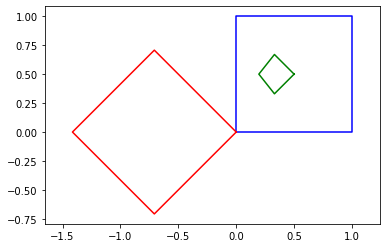

In [4]:
transform_square()

...the blue unit square has been rotated by $\frac{3\pi}{4}$. The vertices of the red square are then sigmoided - the green quadrilateral.

The input and output tensor shapes of a TensorFlow Keras layer are fixed when the layer is created

The input and output tensor shapes of a TensorFlow Keras layer are fixed when the layer is created.

In [5]:
from tensorflow.keras import layers

layer = layers.Dense(32, input_shape = (784, ))

...axis 1 of the input shape has dimension 784. The zero axis - the batch dimension - is unspecified and arbitrary. This layer outputs a vector of length 32.

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784, )))
model.add(layers.Dense(16))

...the connecting downstream layer must expect a compatible input vector - 32 elements along the first axis. In fact Tensorflow is clever enough to know this. If you wish the second layer to output a tensor with 16 elements along the first axis you need only write `layers.Dense(16)`.

In [7]:
# Axis zero has size 'None' - any value is accepted 

print(model.layers[0].input_shape, model.layers[0].output_shape)

(None, 784) (None, 32)


The shapes of the input and output tensors of the first (index 0) layer... Axis  zero has size None, meaning that any value is accepted. 

In [8]:
# The weight and bias tensors
def print_layer_tensor_shape(n):
    weight_params = model.layers[n].get_weights()[0]
    bias_params = model.layers[n].get_weights()[1]
    print('layer: ', n, '\tweight shape: ', weight_params.shape, '\tbias shape', bias_params.shape)

print_layer_tensor_shape(0)
print_layer_tensor_shape(1)

layer:  0 	weight shape:  (784, 32) 	bias shape (32,)
layer:  1 	weight shape:  (32, 16) 	bias shape (16,)


Code to print the shape of layer tensors... The weight shape is the reverse of the matrix size. I said earlier that the layer zero weight matrix has size $n \times m$ where $m$ is the length of the input vector and $n$ is the length of the outgoing vector. The layer weight tensors have shape `(m, n)` - they are matrix transposes.  

\begin{align*}
(w\cdot x
)_i &= \sum_j w_{ij}x_j \\
    &= \sum_j x_j w_{ij} \\
    &= \sum_j x_j w_{ji}^T \\
    &= (x^T \cdot w^T)_i
\end{align*}

It turns out - and it doesn't matter at all - that TensorFlow organises its tensor operations using the transposes of the conventional matrix and vector representations. This slide shows the relationship between the two ways of performing matrix-vector multiplication. It doesn't matter at all because all computational quantities are arrays (not tensors or matrices) and operations are loops with appropriate counters and end conditions. And it certainly doesn't matter to us because TensorFlow ensures that everything matches. 